In [46]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
import numpy as np
import xarray as xr
import glob
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import pandas as pd
import cmocean.cm as cmo
from matplotlib.patches import Ellipse
from matplotlib.patches import Circle


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1666: UserWarning: The following kwargs were not used by contour: 'negative_linestyles'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


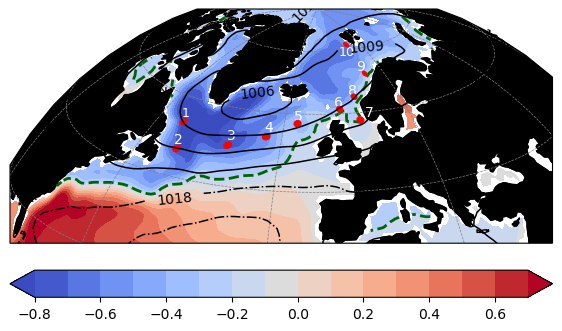

In [132]:
data1 = xr.open_dataset('/work/uo1075/u241321/data/zos_1970-2019_assi_cli.nc')
stream = np.mean(data1['zos'], axis=0) # 
data = xr.open_dataset('/work/uo1075/u241321/data/psl_1969-2019_cli.nc')
psl = np.mean(data['psl'], axis=0)/100
minlat=30
maxlat=90
minlon=-100
maxlon=40

facecolor = 'black'
proj  = ccrs.Orthographic(central_latitude=20.0,central_longitude=-10.0)
    
fig, ax1 = plt.subplots(figsize=(7,7), subplot_kw={"projection":proj})

p_stream = ax1.contourf(stream.lon, stream.lat, stream, zorder=1,
                levels = np.arange(-0.8, 0.8, 0.1), cmap='coolwarm', extend = 'both', transform=ccrs.PlateCarree())


p_stream1 = ax1.contour(stream.lon, stream.lat, stream, zorder=2, negative_linestyles = 'dashed', colors='darkgreen',linewidths =2 ,
                levels = np.arange(-0.2, 0, 0.2), transform=ccrs.PlateCarree())


p_psl = ax1.contour(psl.lon, psl.lat, psl,  colors='black', extend = 'both',linewidths =1.1, 
                levels=[1006, 1009, 1012, 1015, 1018, 1021], zorder=7, linestyles=['-', '-','-', '-', '-.', '-.'], transform=ccrs.PlateCarree())

cbar = plt.colorbar(p_stream, orientation='horizontal', shrink=1, pad = 0.05)
cbar.ax.tick_params(labelsize=10)

# fmt = mticker.LogFormatterMathtext()
# fmt.create_dummy_axis()
plt.clabel(p_psl, p_psl.levels)

states_provinces = cfeature.NaturalEarthFeature(category='cultural',
                                name='admin_1_states_provinces_lines',
                                scale='10m', facecolor=facecolor)
    # ax2.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
    #                                           edgecolor='0.3',
    #                                           facecolor='1'))

ax1.coastlines()
ax1.set_extent([minlon,maxlon,minlat,maxlat])
ax1.add_feature(cfeature.LAND, zorder=0, color=facecolor)
    # ax2.add_feature(cfeature.BORDERS, linewidth=0.2, edgecolor='black')
    # ax2.add_feature(states_provinces, linewidth=0.2, edgecolor='black')

# Gridlines with customized lat/lon label positioning
gl = ax1.gridlines(draw_labels=False, crs=ccrs.PlateCarree(), xlocs=range(-180,180,40), ylocs=range(-90,90,15), color='gray', linestyle='--', linewidth=0.5)
# gl.top_labels = False  # Disable top labels (optional)
# gl.right_labels = False  # Disable right labels (optional)
# gl.xlocator = mticker.FixedLocator([-100, -60, -20, 0, 20, 40])  # Custom longitude intervals
# gl.ylocator = mticker.FixedLocator([30, 40, 50, 60, 70, 80, 90])  # Custom latitude intervals
# gl.xlabel_style = {'size': 10, 'color': 'gray'}
# gl.ylabel_style = {'size': 10, 'color': 'gray'}
# gl.xformatter = cticker.LongitudeFormatter()
# gl.yformatter = cticker.LatitudeFormatter()

# Create circles
# centers for circles
clat= [55, 50, 52.5, 55, 58, 61, 58.5, 63.5, 68.5, 76.5]
clon= [-51, -48, -34.5, -24.5, -16, -2.5, 3.5, 3.5, 11.5, 10.5]
xsize=2.5 # 
ysize=1.5
ccolor = 'red'
ellipse = Ellipse((clon[0], clat[0]), xsize, ysize, linewidth=2,edgecolor='none',facecolor=ccolor,zorder=6, transform=ccrs.PlateCarree())
ax1.add_patch(ellipse)      
ellipse = Ellipse((clon[1], clat[1]), xsize, ysize, linewidth=2,edgecolor='none',facecolor=ccolor,zorder=6, transform=ccrs.PlateCarree())
ax1.add_patch(ellipse)      
ellipse = Ellipse((clon[2], clat[2]), xsize, ysize, linewidth=2,edgecolor='none',facecolor=ccolor,zorder=6, transform=ccrs.PlateCarree())
ax1.add_patch(ellipse)      
ellipse = Ellipse((clon[3], clat[3]), xsize, ysize, linewidth=2,edgecolor='none',facecolor=ccolor,zorder=6, transform=ccrs.PlateCarree())
ax1.add_patch(ellipse)      
ellipse = Ellipse((clon[4], clat[4]), xsize, ysize, linewidth=2,edgecolor='none',facecolor=ccolor,zorder=6, transform=ccrs.PlateCarree())
ax1.add_patch(ellipse)      
ellipse = Ellipse((clon[5], clat[5]), xsize, ysize, linewidth=2,edgecolor='none',facecolor=ccolor,zorder=6, transform=ccrs.PlateCarree())
ax1.add_patch(ellipse)      
ellipse = Ellipse((clon[6], clat[6]), xsize, ysize, linewidth=2,edgecolor='none',facecolor=ccolor,zorder=6, transform=ccrs.PlateCarree())
ax1.add_patch(ellipse)      
ellipse = Ellipse((clon[7], clat[7]), xsize, ysize, linewidth=2,edgecolor='none',facecolor=ccolor,zorder=6, transform=ccrs.PlateCarree())
ax1.add_patch(ellipse)      
ellipse = Ellipse((clon[8], clat[8]), xsize, ysize, linewidth=2,edgecolor='none',facecolor=ccolor,zorder=6, transform=ccrs.PlateCarree())
ax1.add_patch(ellipse)      
ellipse = Ellipse((clon[9], clat[9]), xsize+1.5, ysize+0.2, linewidth=2,edgecolor='none',facecolor=ccolor,zorder=6, transform=ccrs.PlateCarree())
ax1.add_patch(ellipse)      

color='black'
fontsize=10
plt.text(- 51, 55.5, '1', color='w', fontsize=9, horizontalalignment='center', verticalalignment='bottom', transform=ccrs.Geodetic())
plt.text(- 48, 50.5, '2', color='w', fontsize=fontsize, horizontalalignment='center', verticalalignment='bottom', transform=ccrs.Geodetic())
plt.text(- 34.5, 54.5, '3', color='w', fontsize=fontsize, horizontalalignment='center', verticalalignment='center', transform=ccrs.Geodetic())
plt.text(- 24.5, 57, '4', color='w', fontsize=fontsize, horizontalalignment='center', verticalalignment='center', transform=ccrs.Geodetic())
plt.text(- 16, 59.5, '5', color='w', fontsize=fontsize, horizontalalignment='center', verticalalignment='center', transform=ccrs.Geodetic())
plt.text(- 2.5, 62.5, '6', color='w', fontsize=fontsize, horizontalalignment='center', verticalalignment='center', transform=ccrs.Geodetic())
plt.text(7, 60, '7', zorder=10, color='w', fontsize=fontsize, horizontalalignment='center', verticalalignment='center', transform=ccrs.Geodetic())
plt.text(3.5, 65, '8', color='w', fontsize=fontsize, horizontalalignment='center', verticalalignment='center', transform=ccrs.Geodetic())
plt.text(11.5, 70.5, '9', color='w', fontsize=fontsize, horizontalalignment='center', verticalalignment='center', transform=ccrs.Geodetic())
plt.text(10.5, 76.5, '10', color='w', fontsize=9, horizontalalignment='center', verticalalignment='top', transform=ccrs.Geodetic())

plt.savefig('/work/uo1075/u241321/results/p1_new.pdf', bbox_inches='tight')


